In [24]:


import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore
from sklearn.metrics import silhouette_score

In [25]:
df = pd.read_excel('Credit Card Customer Data.xlsx')

Analyize The Data

In [26]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [27]:
df.shape

(660, 7)

In [28]:
##Remove SI_No since it is redundant
df.drop('Sl_No', axis=1, inplace=True)
df.drop('Customer Key', axis=1, inplace=True)

In [29]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


<AxesSubplot:>

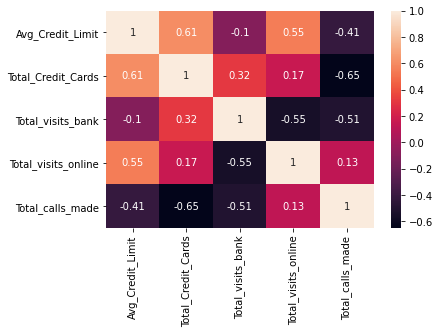

In [30]:
corr = df.corr()
sns.heatmap(corr, annot = True)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


In [32]:
df.isnull().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [33]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


In [34]:
dfScaled=df.apply(zscore)
dfScaledCopy = dfScaled.copy()
dfScaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


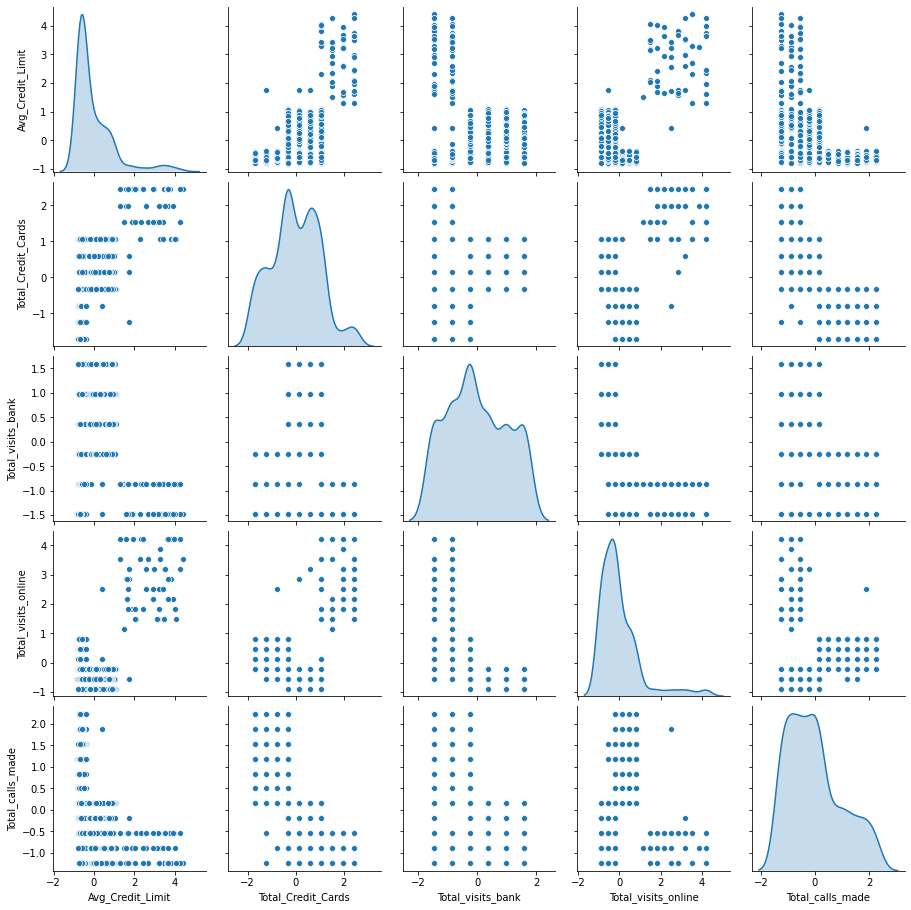

In [35]:
sns.pairplot(dfScaled,diag_kind='kde')



Based on the number of peaks it seems to be between 4 - 5 clusters

### KMeans

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

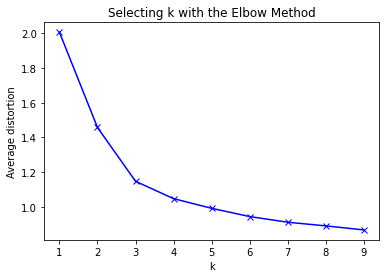

In [36]:
Results = pd.DataFrame(columns=['Type','Clusters','Cophenetic Coeff','Silhouette Score'], data=[])
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(dfScaled)
    prediction=model.predict(dfScaled)
    meanDistortions.append(sum(np.min(cdist(dfScaled, model.cluster_centers_, 'euclidean'), axis=1)) / dfScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')

plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

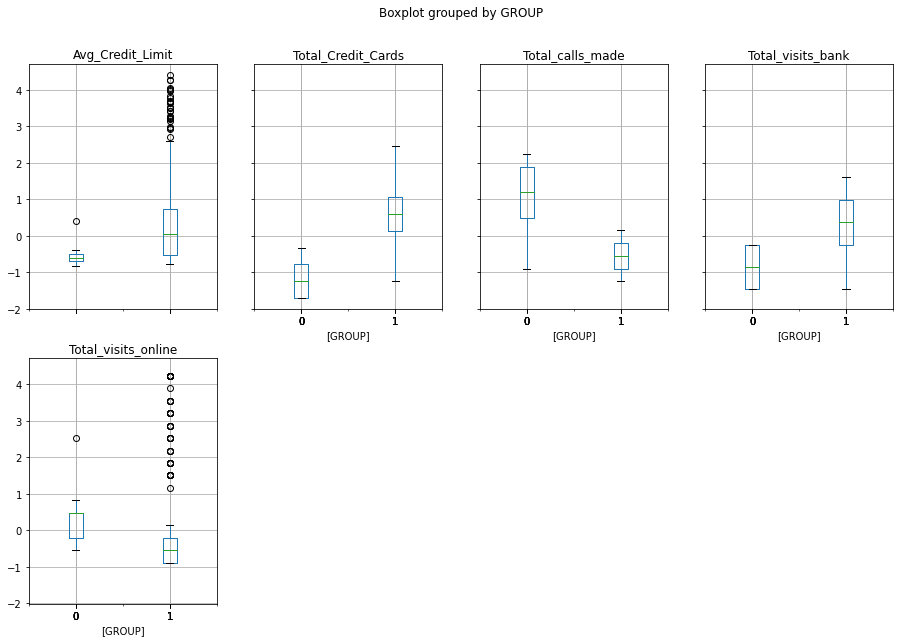

In [37]:
# Let us first start with K = 2
final_model=KMeans(2)
final_model.fit(dfScaled)
prediction=final_model.predict(dfScaled)
dfScaledCopy["GROUP"] = prediction


dfScaledCopy.boxplot(by='GROUP', layout = (2,4),figsize=(15,10));
s_score = silhouette_score(dfScaled,prediction)
Results = Results.append([{'Type':'K Means','Clusters':2, 'Silhouette Score':s_score}],ignore_index=True)

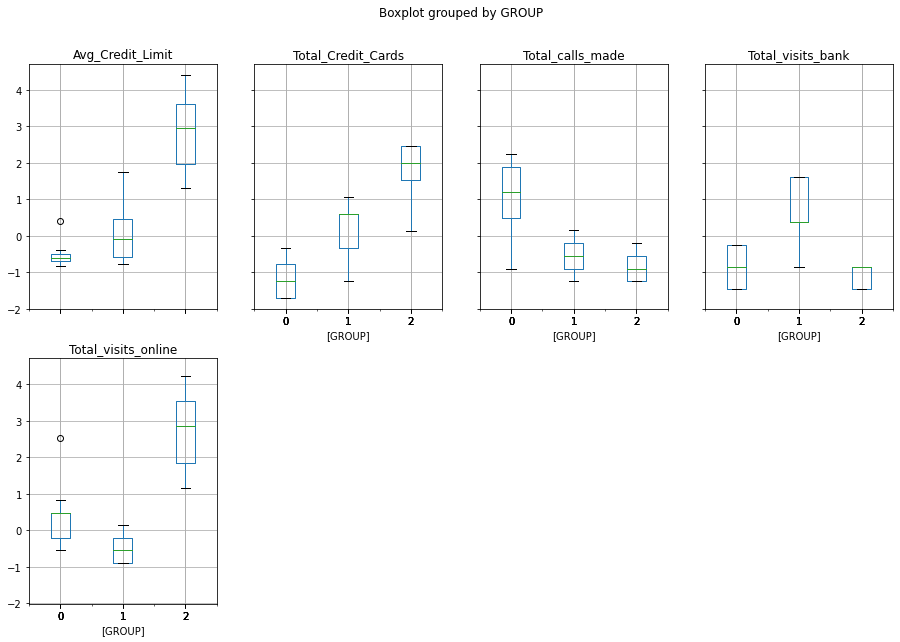

In [38]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(dfScaled)
prediction=final_model.predict(dfScaled)
dfScaledCopy["GROUP"] = prediction


dfScaledCopy.boxplot(by='GROUP', layout = (2,4),figsize=(15,10));
s_score = silhouette_score(dfScaled,prediction)
Results = Results.append([{'Type':'K Means','Clusters':3, 'Silhouette Score':s_score}],ignore_index=True)



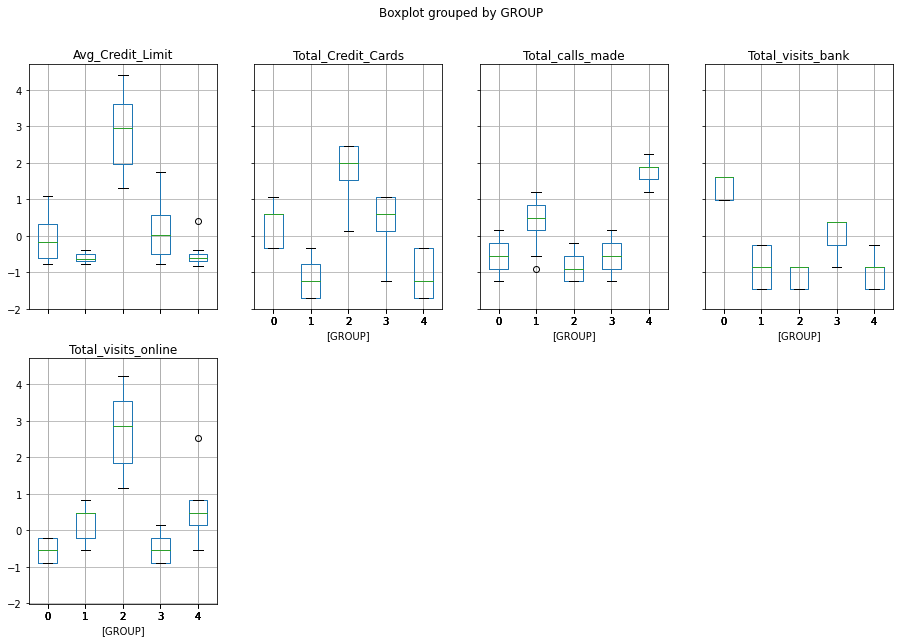

In [39]:
# Let us first start with K = 5
final_model=KMeans(5)
final_model.fit(dfScaled)
prediction=final_model.predict(dfScaled)

#Append the prediction
df["GROUP"] = prediction
dfScaledCopy["GROUP"] = prediction


dfScaledCopy.boxplot(by='GROUP', layout = (2,4),figsize=(15,10));

s_score = silhouette_score(dfScaled,prediction)
Results = Results.append([{'Type':'K Means','Clusters':5, 'Silhouette Score':s_score}],ignore_index=True)

Hierarchical Clustering

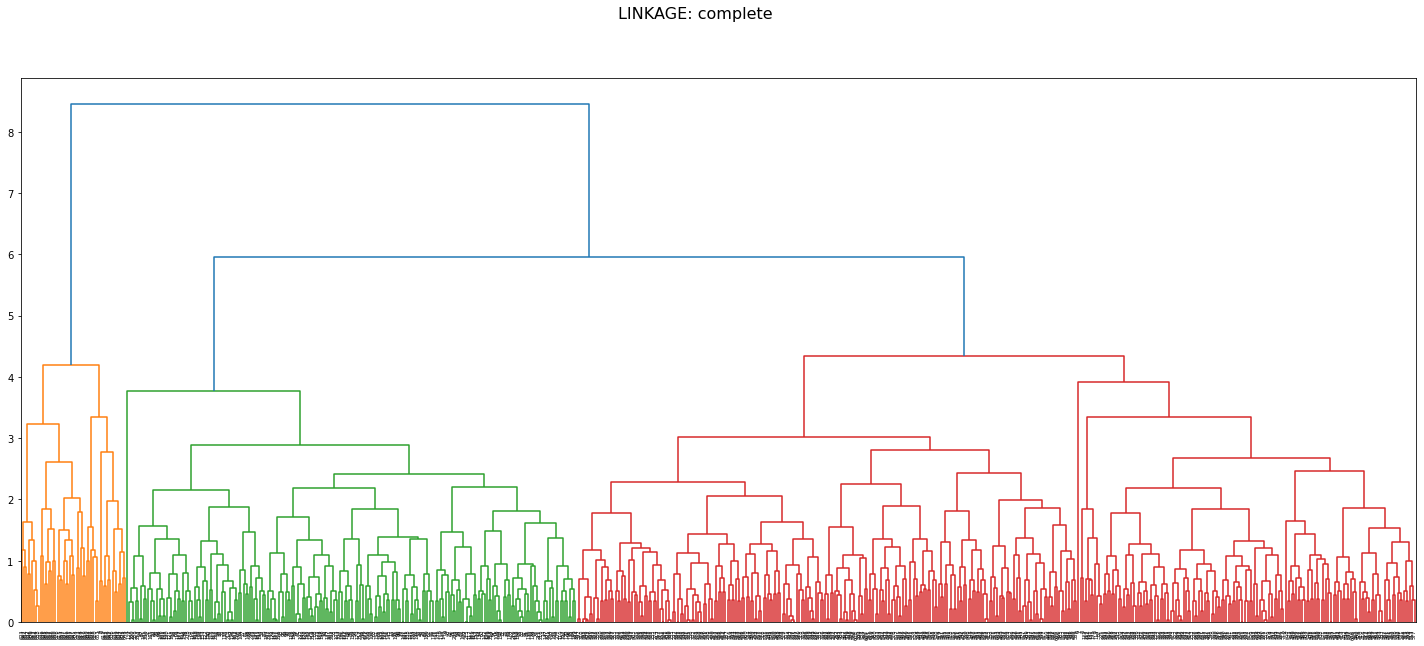

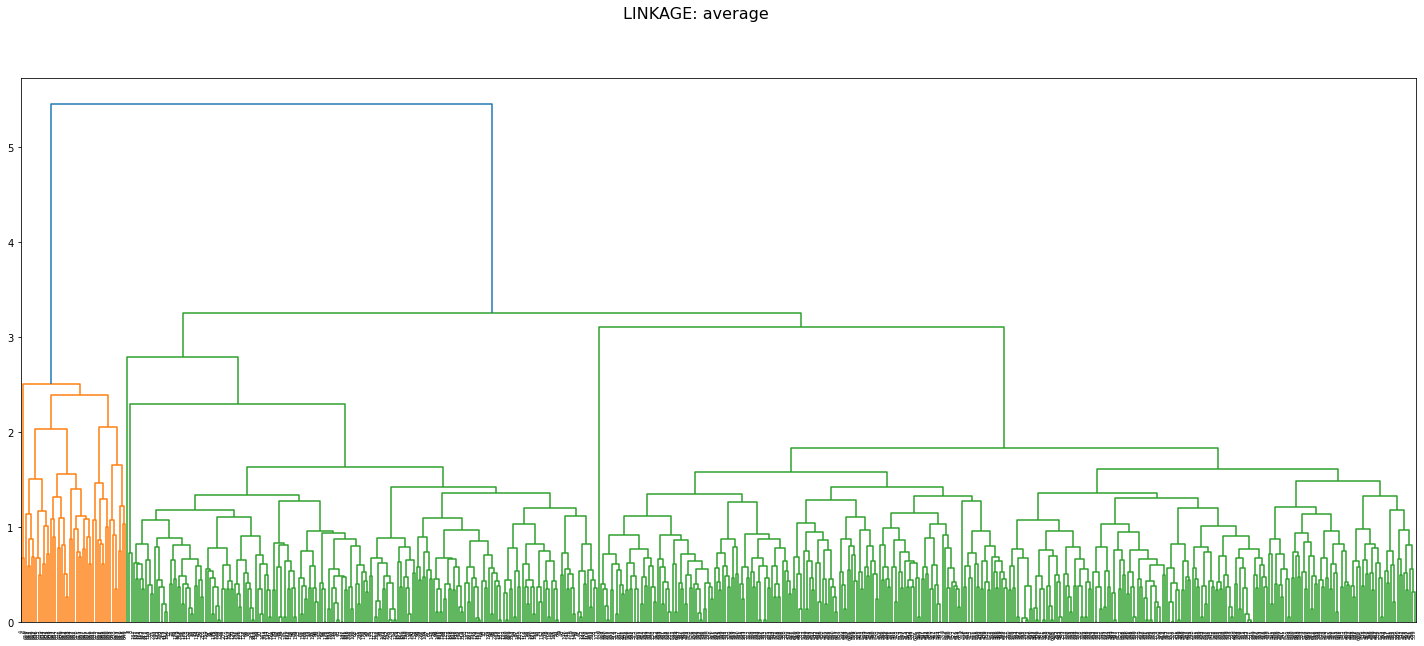

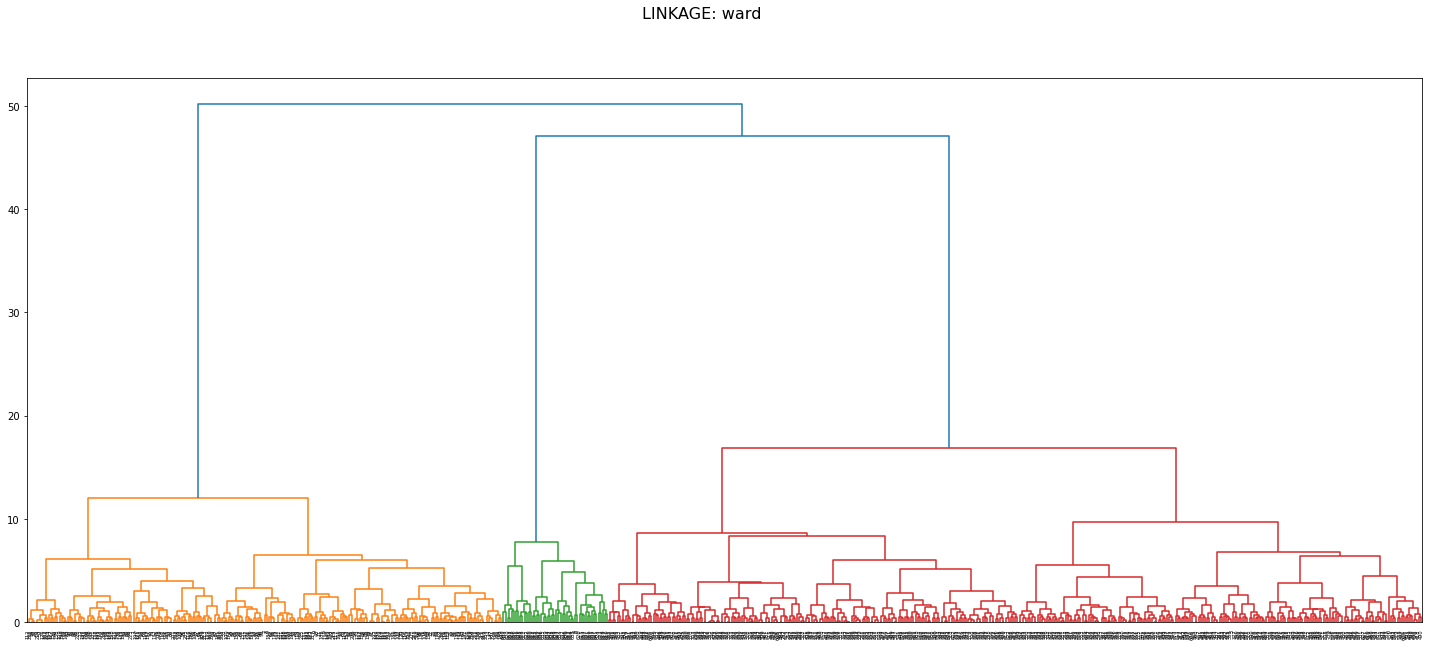

In [40]:

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

for method in ['complete','average','ward']:
# for method in ['ward']:
    fig, axs = plt.subplots(squeeze=False, figsize=(25,10))
    fig.suptitle('LINKAGE: '+method, fontsize=16)

    # plt.figure(figsize=(25, 10))
    Z = linkage(dfScaled, method=method, metric='euclidean')
    dendrogram(Z)


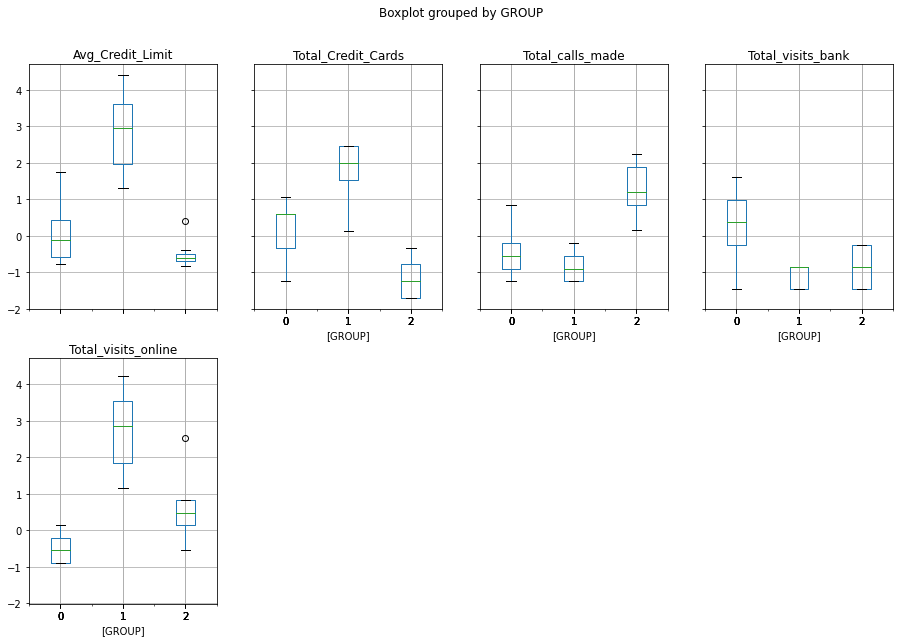

In [41]:
#Linkage Complete, Clusters - 3
model = AgglomerativeClustering(linkage='complete',affinity='euclidean', n_clusters=3)
model.fit(dfScaled)
Z = linkage(dfScaled, method='complete', metric='euclidean')
prediction = model.fit_predict(dfScaled)
df["GROUP"] = prediction
dfScaledCopy["GROUP"] = prediction
dfScaledCopy.boxplot(by='GROUP', layout = (2,4),figsize=(15,10));
plt.show()
c, coph_dists = cophenet(Z , pdist(dfScaled))
s_score = silhouette_score(dfScaled,prediction)
Results = Results.append([{'Type':'Heirarchical - Complete','Clusters':3,'Cophenetic Coeff':c, 'Silhouette Score':s_score}],ignore_index=True)



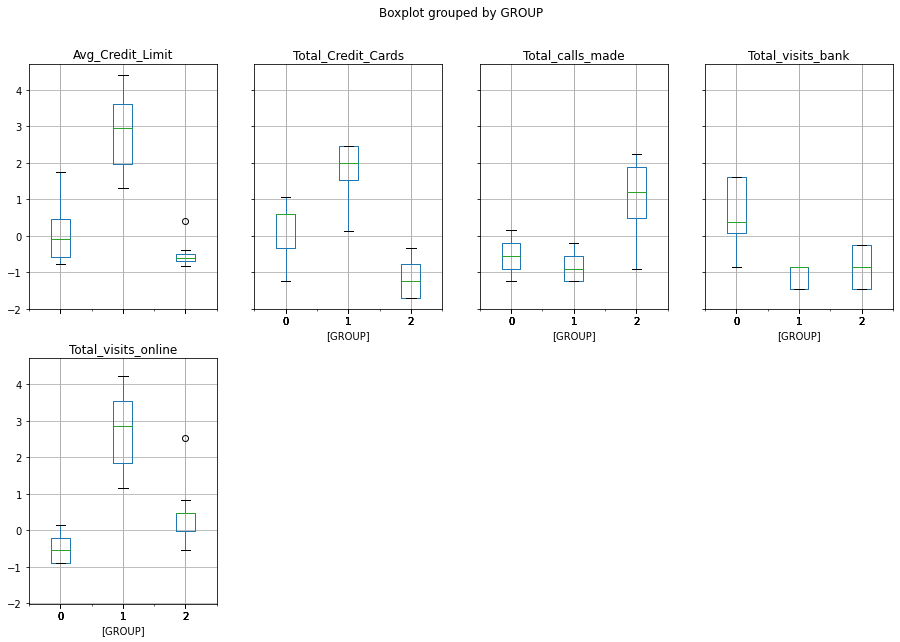

In [42]:
#Linkage Average, Clusters - 3
model = AgglomerativeClustering(linkage='average',affinity='euclidean', n_clusters=3)
Z = linkage(dfScaled, method='average', metric='euclidean')
prediction = model.fit_predict(dfScaled)
# prediction=final_model.predict(dfScaled)
df["GROUP"] = prediction
dfScaledCopy["GROUP"] = prediction
dfScaledCopy.boxplot(by='GROUP', layout = (2,4),figsize=(15,10));
plt.show()
c, coph_dists = cophenet(Z , pdist(dfScaled))
s_score = silhouette_score(dfScaled,prediction)
Results = Results.append([{'Type':'Heirarchical - Average','Clusters':3,'Cophenetic Coeff':c, 'Silhouette Score':s_score}],ignore_index=True)

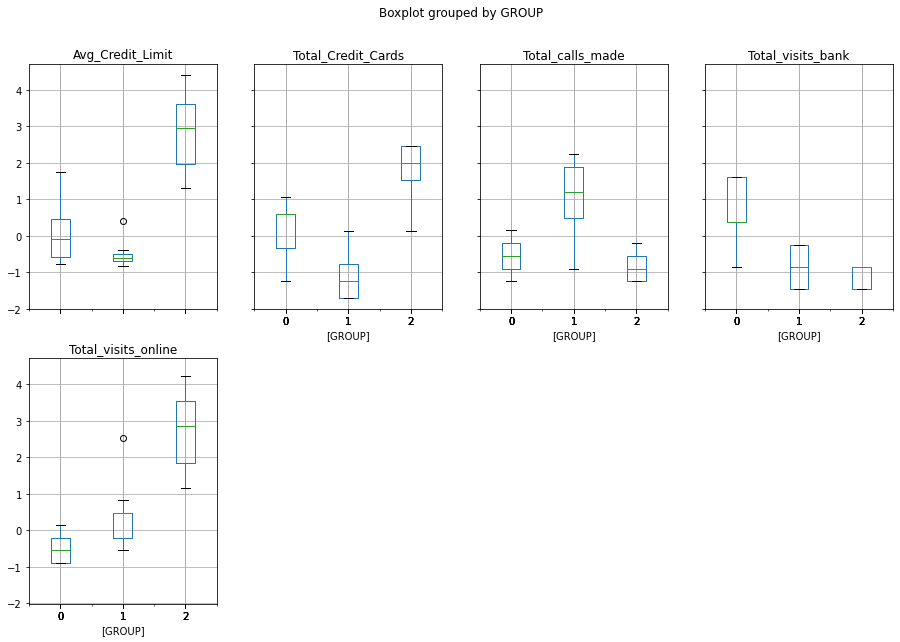

In [43]:
#Linkage Ward, Clusters - 3
model = AgglomerativeClustering(linkage='ward',affinity='euclidean', n_clusters=3)
Z = linkage(dfScaled, method='ward', metric='euclidean')
model.fit(dfScaled)
prediction = model.fit_predict(dfScaled)
df["GROUP"] = prediction
dfScaledCopy["GROUP"] = prediction
dfScaledCopy.boxplot(by='GROUP', layout = (2,4),figsize=(15,10));
plt.show()
c, coph_dists = cophenet(Z , pdist(dfScaled))
s_score = silhouette_score(dfScaled,prediction)
Results = Results.append([{'Type':'Heirarchical - Ward','Clusters':3,'Cophenetic Coeff':c, 'Silhouette Score':s_score}],ignore_index=True)

In [44]:
Results.head(10)


,Type,Clusters,Cophenetic Coeff,Silhouette Score
0,K Means,2,NaN,0.418425
1,K Means,3,NaN,0.515718
2,K Means,5,NaN,0.272690
3,Heirarchical - Complete,3,0.859973,0.502644
4,Heirarchical - Average,3,0.897708,0.515922
5,Heirarchical - Ward,3,0.741516,0.514764


#### cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram closer it is to 1, the better is the clustering

Amongst the Heirarchical Linkages, "Average" gives the highest Cophenetic Coefficient Value

#### Silhouette Score is better when closer 1 and worse when closer to -1

K Means gives the best Silhouette Score. Therefore using K Means for clustering for this data with 3 Clusters


Lets look at the K Means Groupings

In [45]:
final_model=KMeans(3)
final_model.fit(dfScaled)
prediction=final_model.predict(dfScaled)

df["GROUP"] = prediction
print("Groups Assigned : \n")
df.head()


Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,0
1,50000,3,0,10,9,1
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,2


In [46]:
dfClus = df.groupby(['GROUP'])
dfClus.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000
1,12174.107143,2.410714,0.933036,3.553571,6.870536
2,141040.000000,8.740000,0.600000,10.900000,1.080000


### There are 3 Segments of Customers

* First Segment has a mid credit limit has average of 5 cards visits the bank but not online. Total calls made are in the mid level (around 2 avg)
* Second segment has a lower credit limit, has fewer cards, will make maybe one visit to the bank and will occassionally visit online. Makes the most calls
* Third segment has the highest credit limit, has the most number of cards, rarely visits the bank, prefers online visits, makes the least ammount of calls


### Recommendations
* For the first segment, may be have in branch marketing to advertise the online banking features to shift them online.
* Market to the second segment to move them online as servicing them via calls is more expensive and they bring less value. May be when they call they are presented with the tasks they can complete online to save time
* For the third segment increase the marketing and touch points online to reach the highest value customers (with the highest credit limits and credit cards)